In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

df=pd.read_csv("/content/drive/MyDrive/Deeplearning/Final Project/Reviews.csv", encoding='latin-1', index_col=0)
df=df.loc[:,["Text","Score"]].dropna().reset_index(drop=True)

In [ ]:
len(df)

568454

In [ ]:
df.loc[df['Score'] <=2, 'Score'] = -1
df.loc[df['Score'] > 3, 'Score'] = 1
df.loc[df['Score'] == 3, 'Score'] = 0
df['len'] = df.Text.apply(lambda x: len(x.split()))
df = df[df.len<50]

In [ ]:
import re
df['Text']=df['Text'].apply(lambda row : re.sub('<.*?>','',row))

In [ ]:
df["Score"].value_counts()

 1    203802
-1     30286
 0     14346
Name: Score, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
rev=df["Text"]
target=df["Score"]
x_train, x_test, y_train, y_test = train_test_split(rev,target,test_size=0.1,random_state=0,stratify=target)


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 80
batch_size = 32

#Tokenizing
tokenizer=Tokenizer(max_features,oov_token="<?>")
tokenizer.fit_on_texts(x_train)
X_train=tokenizer.texts_to_sequences(x_train)
X_test=tokenizer.texts_to_sequences(x_test)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# X_train with upper case "X" is tokenized, x_train with lower case "x" is not

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
print('Pad sequences (samples x text length)')
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

223590 train sequences
24844 test sequences
Pad sequences (samples x text length)
X_train shape: (223590, 80)
X_test shape: (24844, 80)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense



model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
#model.add(SimpleRNN(32, return_sequences=True))
#model.add(SimpleRNN(32, return_sequences=True))
#model.add(SimpleRNN(16, return_sequences=True))
model.add(SimpleRNN(32)) # default activation is "tanh"
model.add(Dense(1))
model.summary()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_data=(X_test,y_test))

keras.backend.clear_session()
del model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 64)            640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6988/6988 [==============================] - 189s 27ms/step - loss: 0.2937 - accuracy: 0.7103 - val_loss: -0.2690 - val_accuracy: 0.7621
Epoch 2/10
6988/6988 [==============================] - 183s 26ms/step - loss: 0.4042 - accuracy: 0.6688 - val_loss: 0.2161 - val_accuracy: 0.5247
Epoch 3/10
6988/698

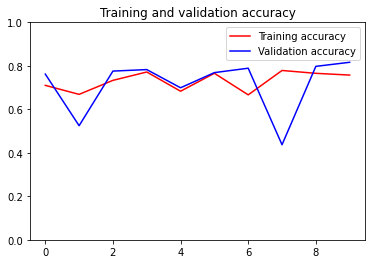

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss= history.history['loss']
epochs = range(len(loss))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylim(ymax=1,ymin=0)

plt.show()

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 80
batch_size = 32

#Tokenizing
tokenizer=Tokenizer(max_features,oov_token="<?>")
tokenizer.fit_on_texts(x_train)
X_train=tokenizer.texts_to_sequences(x_train)
X_test=tokenizer.texts_to_sequences(x_test)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# X_train with upper case "X" is tokenized, x_train with lower case "x" is not

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
print('Pad sequences (samples x text length)')
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

223590 train sequences
24844 test sequences
Pad sequences (samples x text length)
X_train shape: (223590, 80)
X_test shape: (24844, 80)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense



model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
#model.add(SimpleRNN(32, return_sequences=True))
#model.add(SimpleRNN(32, return_sequences=True))
#model.add(SimpleRNN(16, return_sequences=True))
model.add(SimpleRNN(32)) # default activation is "tanh"
model.add(Dense(1))
model.summary()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics='accuracy')
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_data=(X_test,y_test))

keras.backend.clear_session()
del model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 64)            640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6988/6988 [==============================] - 186s 26ms/step - loss: 1.8666 - accuracy: 0.6147 - val_loss: 1.4048 - val_accuracy: 0.7515
Epoch 2/10
6988/6988 [==============================] - 181s 26ms/step - loss: 0.3922 - accuracy: 0.6814 - val_loss: 0.0357 - val_accuracy: 0.7577
Epoch 3/10
6988/6988

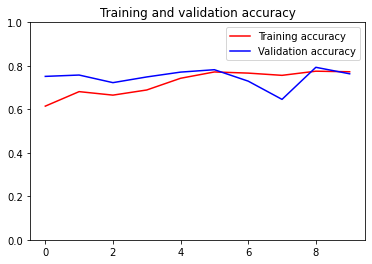

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss= history.history['loss']
epochs = range(len(loss))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.ylim(ymax=1,ymin=0)

plt.show()